In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/CombinedSalesData 2009-2011.xlsx'

try:
    df = pd.read_excel(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
1,564754,21221,SET/4 BADGES CUTE CREATURES,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August


In [ ]:
# Creating the 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


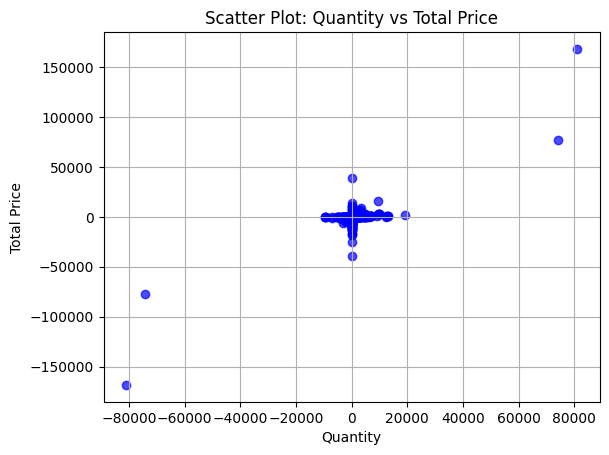

In [ ]:
plt.scatter(df['Quantity'], df['TotalPrice'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()

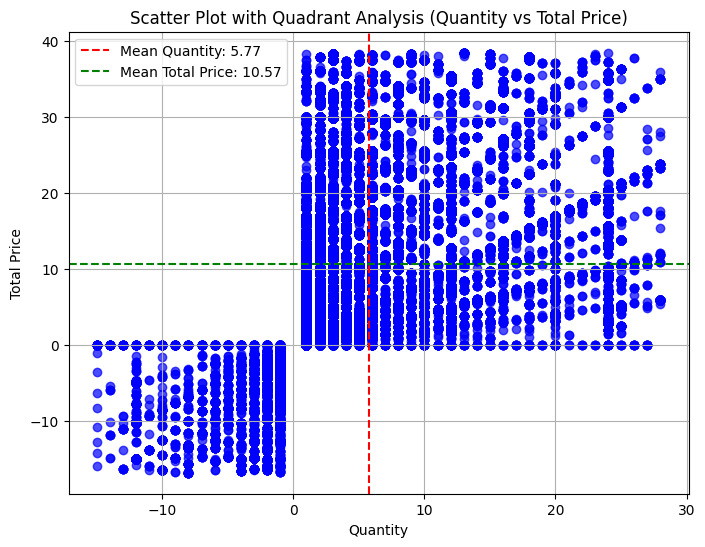

In [ ]:
# Removing outliers using IQR method
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
Q1_price = df['TotalPrice'].quantile(0.25)
Q3_price = df['TotalPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Defining lower and upper bounds for outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filtering out outliers
filtered_df = df[
    (df['Quantity'] >= lower_bound_quantity) &
    (df['Quantity'] <= upper_bound_quantity) &
    (df['TotalPrice'] >= lower_bound_price) &
    (df['TotalPrice'] <= upper_bound_price)
]

# Quadrant Analysis: Calculate the mean for Quantity and TotalPrice
mean_quantity = filtered_df['Quantity'].mean()
mean_totalprice = filtered_df['TotalPrice'].mean()

# Scatter plot with quadrants
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Quantity'], filtered_df['TotalPrice'], color='blue', alpha=0.7)

# Adding quadrant lines (mean of Quantity and TotalPrice)
plt.axvline(x=mean_quantity, color='red', linestyle='--', label=f'Mean Quantity: {mean_quantity:.2f}')
plt.axhline(y=mean_totalprice, color='green', linestyle='--', label=f'Mean Total Price: {mean_totalprice:.2f}')

# Adding titles and labels
plt.title('Scatter Plot with Quadrant Analysis (Quantity vs Total Price)')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,Customer ID,Country,InvoiceDate,InvoiceTime,Year,Month,TotalPrice
0,564754,21068,VINTAGE BILLBOARD LOVE/HATE MUG,1.0,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
1,564754,21221,SET/4 BADGES CUTE CREATURES,1.0,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
2,564754,21232,STRAWBERRY CERAMIC TRINKET BOX,1.0,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
3,564754,21379,CAMPHOR WOOD PORTOBELLO MUSHROOM,1.0,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46
4,564754,21774,DECORATIVE CATS BATHROOM BOTTLE,1.0,2011-08-30 10:29:00,2.46,NaN,United Kingdom,2011-08-30,10:29:00,2011,August,2.46


In [ ]:
import pandas as pd

# Assuming df is your original DataFrame

# Convert 'InvoiceDate' to datetime format if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by 'InvoiceDate' and sum the 'Quantity'
daily_sales = df.groupby('InvoiceDate')['Quantity'].sum().reset_index()

# Rename the columns for clarity
daily_sales.columns = ['Date', 'TotalQuantity']


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDateTime',
       'UnitPrice', 'Customer ID', 'Country', 'InvoiceDate', 'InvoiceTime',
       'Year', 'Month'],
      dtype='object')

In [ ]:
daily_sales.head()


,Date,TotalQuantity
0,2009-12-01,23705
1,2009-12-02,29474
2,2009-12-03,45609
3,2009-12-04,19849
4,2009-12-05,5119


In [ ]:
daily_sales.shape

(604, 2)

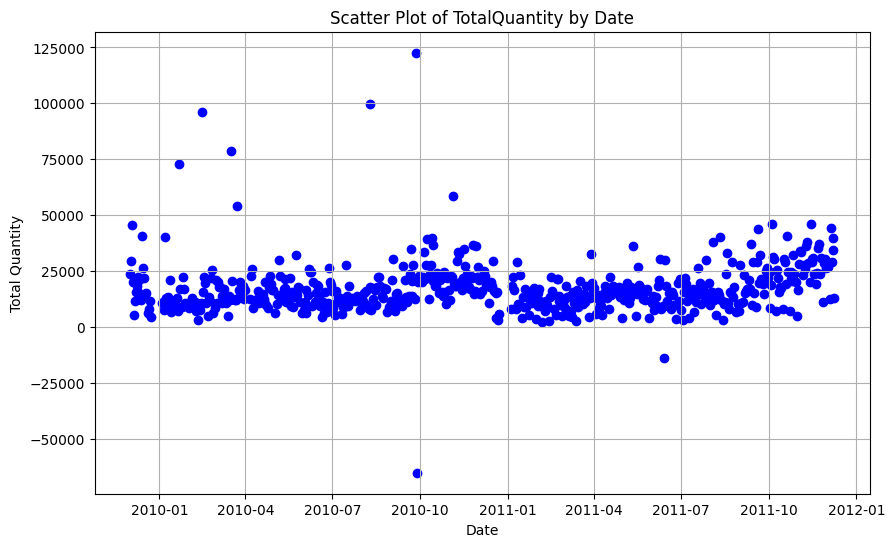

In [ ]:
# Ensure the 'Date' column is in datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_sales['Date'], daily_sales['TotalQuantity'], color='blue', marker='o')

# Set plot title and labels
plt.title('Scatter Plot of TotalQuantity by Date')
plt.xlabel('Date')
plt.ylabel('Total Quantity')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the 'Date' column is in datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])


In [ ]:
# Convert Date to numerical format (ordinal)
daily_sales['Date_ordinal'] = daily_sales['Date'].map(pd.Timestamp.toordinal)
# Define the features (X) and target (y)
X = daily_sales[['Date_ordinal']]
y = daily_sales['TotalQuantity']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Calculate comparison metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 114969410.28333817
R-squared (R2): -0.009813334466801216


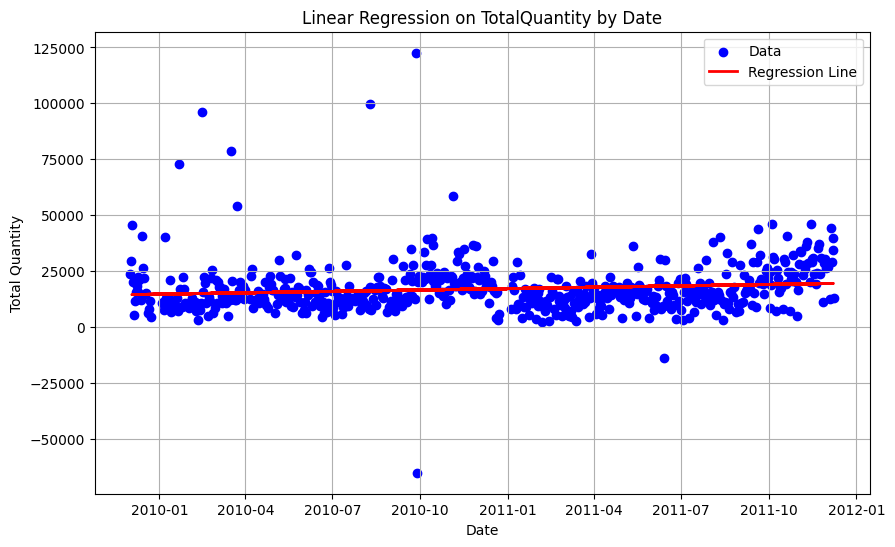

In [ ]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(daily_sales['Date'], daily_sales['TotalQuantity'], color='blue', marker='o', label='Data')
plt.plot(X_test['Date_ordinal'].apply(lambda x: pd.Timestamp.fromordinal(x)), y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on TotalQuantity by Date')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()


Q1: 10844.0, Q3: 20971.0, IQR: 10127.0
Lower Bound: -4346.5, Upper Bound: 36161.5


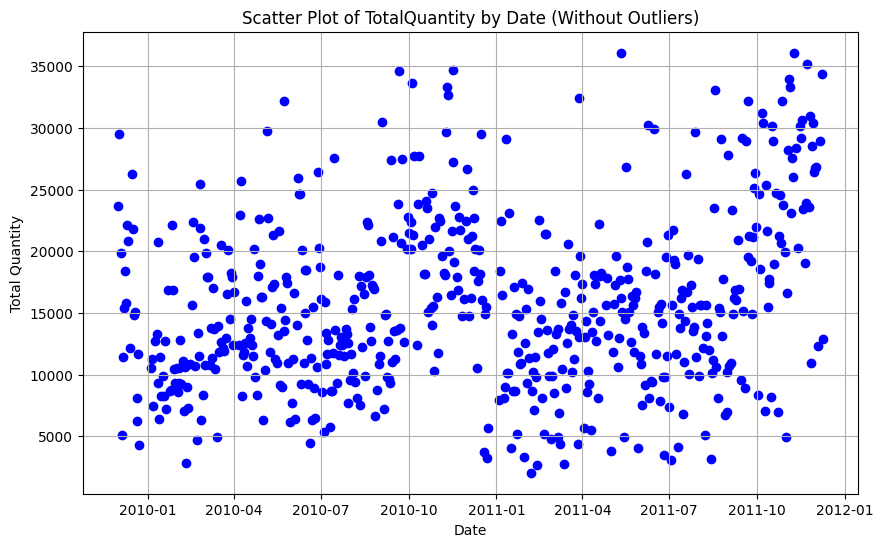

In [ ]:
 # Ensure the 'Date' column is in datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = daily_sales['TotalQuantity'].quantile(0.25)
Q3 = daily_sales['TotalQuantity'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df_no_outliers1 =daily_sales[(daily_sales['TotalQuantity'] >= lower_bound) & (daily_sales['TotalQuantity'] <= upper_bound)]

# Scatter plot of the data after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers1['Date'], df_no_outliers1['TotalQuantity'], color='blue', marker='o')
plt.title('Scatter Plot of TotalQuantity by Date (Without Outliers)')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

<ipython-input-13-d36c306fcdf6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers1['Date'] = pd.to_datetime(df_no_outliers1['Date'])
<ipython-input-13-d36c306fcdf6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)


Mean Squared Error (MSE): 40548981.186312675
R-squared (R2): 0.026807573478857982


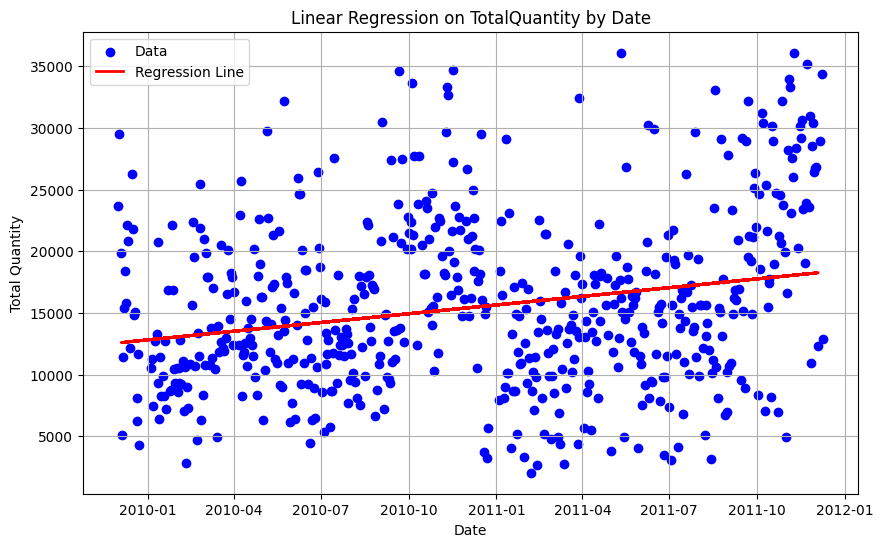

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the 'Date' column is in datetime format
df_no_outliers1['Date'] = pd.to_datetime(df_no_outliers1['Date'])

# Convert Date to numerical format (ordinal)
df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)

# Define the features (X) and target (y)
X = df_no_outliers1[['Date_ordinal']]
y = df_no_outliers1['TotalQuantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate comparison metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers1['Date'], df_no_outliers1['TotalQuantity'], color='blue', marker='o', label='Data')
plt.plot(X_test['Date_ordinal'].apply(lambda x: pd.Timestamp.fromordinal(x)), y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on TotalQuantity by Date')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 40,548,981.19

What it means: MSE measures the average of the squares of the errors, i.e., the difference between the actual values and the predicted values. In this case, the MSE value is quite large, which indicates that the model's predictions are, on average, far from the actual TotalQuantity values. A lower MSE would indicate a better fit, so this suggests that the model isn't performing very well.
R-squared (R2): 0.027

What it means: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (TotalQuantity) that is explained by the independent variable (Date). The R2 value ranges from 0 to 1, where:
0: Indicates that the model does not explain any of the variability of the response data around its mean.
1: Indicates that the model explains all the variability of the response data around its mean.
In this case (R2 = 0.027): This value is very close to 0, meaning that only about 2.7% of the variance in TotalQuantity can be explained by the Date in your linear regression model. This suggests that the date is not a strong predictor of the quantity sold, and the linear model isn't capturing much of the underlying pattern in the data.
What to do next:
Given the results, the linear model might not be the best approach for this data. Here are a few suggestions:

Check for Non-linearity: The relationship between Date and TotalQuantity might not be linear. Consider other regression techniques (e.g., polynomial regression, time series models) that can capture more complex relationships.

Explore Other Features: Perhaps TotalQuantity is influenced by other factors that aren't captured in your current model. Consider adding more features or using a multivariate model.

Data Transformation: Sometimes, transforming the data (e.g., log transformation) can improve model performance.

Residual Analysis: Analyze the residuals (the difference between actual and predicted values) to understand where the model is failing and why.

By experimenting with these steps, you may be able to build a more accurate predictive model for TotalQuantity.

Q1: 10844.0, Q3: 20971.0, IQR: 10127.0
Lower Bound: -4346.5, Upper Bound: 36161.5
Mean Squared Error (MSE): 45577576.87638631
R-squared (R2): 0.07368477714731281


<ipython-input-14-0b7cf3538ee8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)


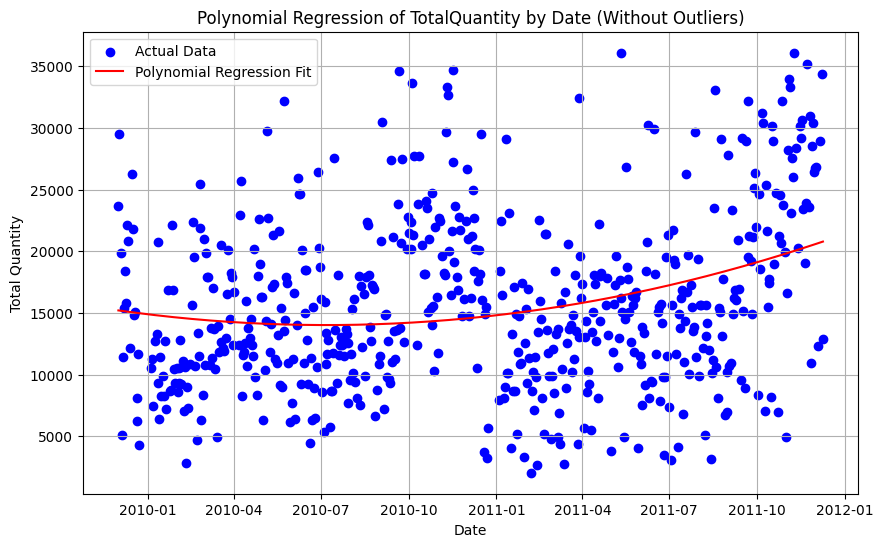

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = daily_sales['TotalQuantity'].quantile(0.25)
Q3 = daily_sales['TotalQuantity'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df_no_outliers1 = daily_sales[(daily_sales['TotalQuantity'] >= lower_bound) & (daily_sales['TotalQuantity'] <= upper_bound)]

# Convert 'Date' to ordinal
df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree for different results
X_poly = poly.fit_transform(df_no_outliers1[['Date_ordinal']])

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, df_no_outliers1['TotalQuantity'])

# Predict the Total Quantity
y_poly_pred = model.predict(X_poly)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(df_no_outliers1['TotalQuantity'], y_poly_pred)
r2 = r2_score(df_no_outliers1['TotalQuantity'], y_poly_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers1['Date'], df_no_outliers1['TotalQuantity'], color='blue', marker='o', label='Actual Data')
plt.plot(df_no_outliers1['Date'], y_poly_pred, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression of TotalQuantity by Date (Without Outliers)')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.legend()
plt.show()


After applying polynomial regression to model the relationship between TotalQuantity and Date in our dataset, the results provide insights into the performance and fit of the model:

Interquartile Range (IQR) and Outlier Detection:

The Interquartile Range (IQR) was calculated as 10,127, with the first quartile (Q1) at 10,844 and the third quartile (Q3) at 20,971.
Using the IQR, we determined the lower bound for outliers as -4,346.5 and the upper bound as 36,161.5. Data points outside these bounds were identified as outliers and subsequently removed from the dataset to ensure a more accurate and robust model.
Model Performance:

The Mean Squared Error (MSE) was found to be 45,577,576.88. MSE measures the average squared difference between the actual and predicted values; in this case, a higher MSE indicates that there is a significant deviation between the model’s predictions and the actual data points. This suggests that the model may not be perfectly capturing the underlying relationship between TotalQuantity and Date.
The R-squared (R²) value was calculated to be 0.074. R² indicates the proportion of the variance in the dependent variable (TotalQuantity) that is predictable from the independent variable (Date). An R² value of 0.074 implies that the model explains only about 7.4% of the variance in TotalQuantity, indicating a relatively weak fit.
Model Interpretation:

The polynomial regression model, even after removing outliers, does not seem to capture the complexities or patterns within the data effectively. The low R² value suggests that the relationship between Date and TotalQuantity is not strongly linear or quadratic, and other factors might be influencing the sales quantities over time.
Given the high MSE and low R², the current model may not be sufficient for making accurate predictions. Further model tuning, such as experimenting with different polynomial degrees, or exploring other models like time series forecasting or more advanced regression techniques, might yield better results.
Caution with Data Modification:

A SettingWithCopyWarning was generated during the preprocessing phase, which occurs when trying to set values on a slice of the DataFrame. This warning is important because it indicates that changes might not be applied correctly. To avoid this, using .loc for setting values in the DataFrame is recommended for more predictable results.

Q1: 10844.0, Q3: 20971.0, IQR: 10127.0
Lower Bound: -4346.5, Upper Bound: 36161.5


<ipython-input-15-982e229e9461>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers1['Date'] = pd.to_datetime(df_no_outliers1['Date'])
<ipython-input-15-982e229e9461>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)


Mean Squared Error (MSE): 43413815.46754568
R-squared (R²): -0.041949641725236964


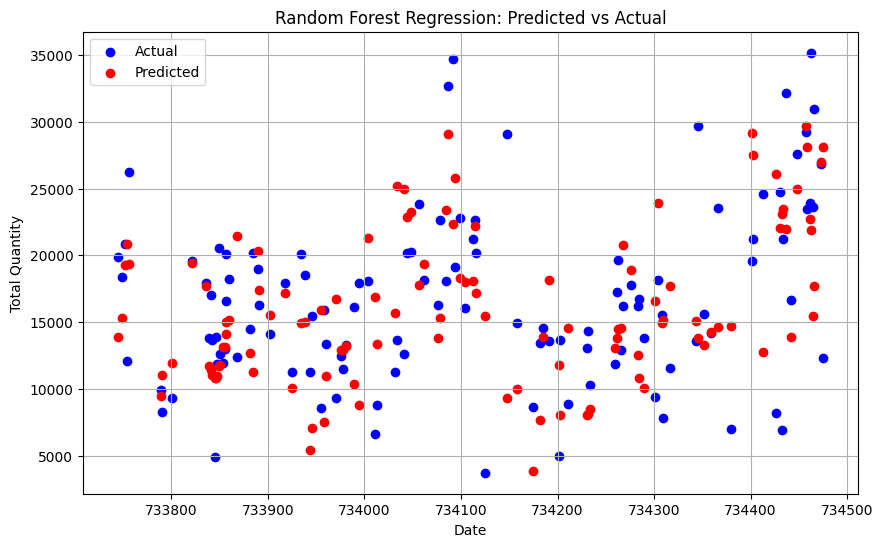

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ensure the 'Date' column is in datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = daily_sales['TotalQuantity'].quantile(0.25)
Q3 = daily_sales['TotalQuantity'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove outliers
df_no_outliers1 = daily_sales[(daily_sales['TotalQuantity'] >= lower_bound) & (daily_sales['TotalQuantity'] <= upper_bound)]

# Convert the 'Date' to ordinal for regression analysis
df_no_outliers1['Date'] = pd.to_datetime(df_no_outliers1['Date'])
df_no_outliers1['Date_ordinal'] = df_no_outliers1['Date'].map(pd.Timestamp.toordinal)

# Split the data into training and testing sets
X = df_no_outliers1[['Date_ordinal']]
y = df_no_outliers1['TotalQuantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Scatter plot of the predictions vs the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()


Outlier Handling: The interquartile range (IQR) for the Quantity variable is 10,127.0, with a lower bound of -4,346.5 and an upper bound of 36,161.5. This range helps in identifying and removing outliers to ensure that extreme values do not disproportionately affect the model.

SettingWithCopyWarning: The warnings observed indicate that changes were made to a slice of the DataFrame, which can sometimes lead to unexpected behavior. To avoid this, it's recommended to use .loc for assignments to ensure that modifications are applied to the DataFrame correctly.

Model Performance: The Mean Squared Error (MSE) of the model is 43,413,815.47, which is relatively high, suggesting that the model's predictions are not very close to the actual values. A high MSE indicates substantial prediction errors and may reflect issues with model fit or data quality.

R-squared Value: The R-squared (R²) value of -0.042 is notably negative, which is unusual and suggests that the model is performing worse than a simple mean-based prediction. In typical cases, R² values range from 0 to 1, where higher values indicate better model performance. A negative R² implies that the model fails to capture the variability in the data effectively and could be due to incorrect model specification, inadequate features, or inherent complexities in the dataset.

Overall, these results highlight that the current regression model might not be appropriate for predicting the Quantity based on InvoiceDate. Further model refinement or alternative modeling approaches may be necessary to improve prediction accuracy and better fit the data.

In [ ]:
# Group by 'Description' and sum the 'Quantity'
top_selling_products = df.groupby('Description')['Quantity'].sum()

# Sort the products by total quantity in descending order
top_selling_products = top_selling_products.sort_values(ascending=False)

# Get the top 10 selling products
top_10_selling_products = top_selling_products.head(10)

# Convert to list
top_10_selling_products_list = top_10_selling_products.index.tolist()

print("Top 10 Selling Products:")
for product in top_10_selling_products_list:
    print(product)


Top 10 Selling Products:
WORLD WAR 2 GLIDERS ASSTD DESIGNS
WHITE HANGING HEART T-LIGHT HOLDER
ASSORTED COLOUR BIRD ORNAMENT
JUMBO BAG RED RETROSPOT
BROCADE RING PURSE
PACK OF 60 PINK PAISLEY CAKE CASES
60 TEATIME FAIRY CAKE CASES
PACK OF 72 RETROSPOT CAKE CASES
SMALL POPCORN HOLDER
PACK OF 72 RETRO SPOT CAKE CASES


In [ ]:
# Define the product description you want to filter by
product_description = 'WHITE HANGING HEART T-LIGHT HOLDER'
# Filter the DataFrame
WHTLH_data = df[df['Description'] == product_description]
# Optionally, save the filtered data to a new Excel file
WHTLH_data.to_excel('/content/drive/MyDrive/WHTLH_data.xlsx', index=False)

In [ ]:
# Convert the InvoiceDate field to datetime datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert object fields to string type
df['Description'] = df['Description'].astype('string')

# Convert int64 fields to float64
df['Quantity'] = df['Quantity'].astype('float64')

# Convert float64 fields to int64
df['UnitPrice'] = df['UnitPrice'].astype('float64')

# Convert object fields to category type
df['Country'] = df['Country'].astype('category')



In [ ]:
# Print the data types of each field
print("Data types of each field:")
print(df.dtypes)

Data types of each field:
InvoiceNo                  object
StockCode                  object
Description        string[python]
Quantity                  float64
InvoiceDateTime    datetime64[ns]
UnitPrice                 float64
Customer ID               float64
Country                  category
InvoiceDate        datetime64[ns]
InvoiceTime                object
Year                        int64
Month                      object
dtype: object


Text(0.5, 1.0, 'WHITE HANGING HEART T-LIGHT HOLDER ')

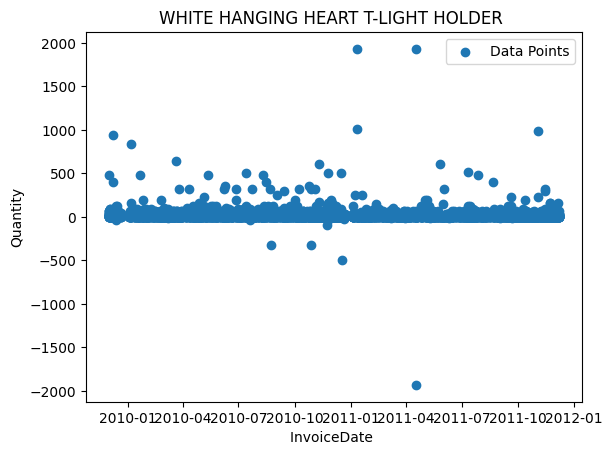

In [ ]:

# Assuming x and y are your data points
x = WHTLH_data['InvoiceDate']
y = WHTLH_data['Quantity']


# Plot the scatter plot
plt.scatter(x, y, label='Data Points')
# Add labels, legend, etc.
plt.xlabel('InvoiceDate ')
plt.ylabel('Quantity')
plt.legend()
plt.title('WHITE HANGING HEART T-LIGHT HOLDER ')

<ipython-input-21-5e9179cc9712>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHTLH_data['Z_score'] = zscore(WHTLH_data['Quantity'])


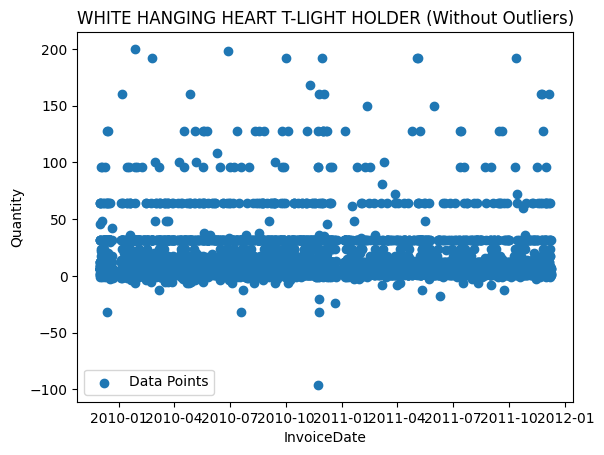

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming WHTLH_data is your DataFrame containing 'InvoiceDate' and 'Quantity'

# Calculate the Z-scores of the 'Quantity' column
WHTLH_data['Z_score'] = zscore(WHTLH_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
WHTLH_data_no_outliers = WHTLH_data[(WHTLH_data['Z_score'] < threshold) & (WHTLH_data['Z_score'] > -threshold)]

# Drop the 'Z_score' column as it's no longer needed
WHTLH_data_no_outliers = WHTLH_data_no_outliers.drop(columns=['Z_score'])

# Plot the scatter plot without outliers
x = WHTLH_data_no_outliers['InvoiceDate']
y = WHTLH_data_no_outliers['Quantity']

plt.scatter(x, y, label='Data Points')
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.legend()
plt.title('WHITE HANGING HEART T-LIGHT HOLDER (Without Outliers)')
plt.show()


<ipython-input-22-9ad79eba47a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHTLH_data['Z_score'] = zscore(WHTLH_data['Quantity'])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


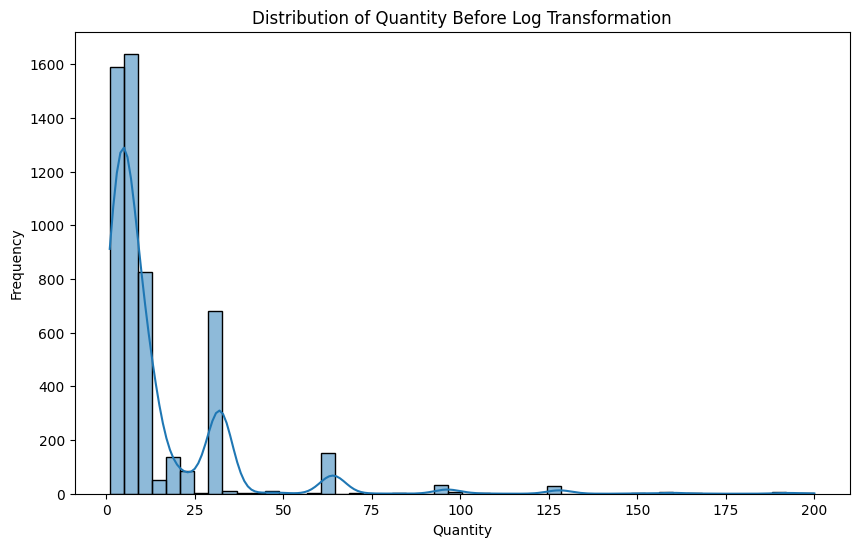

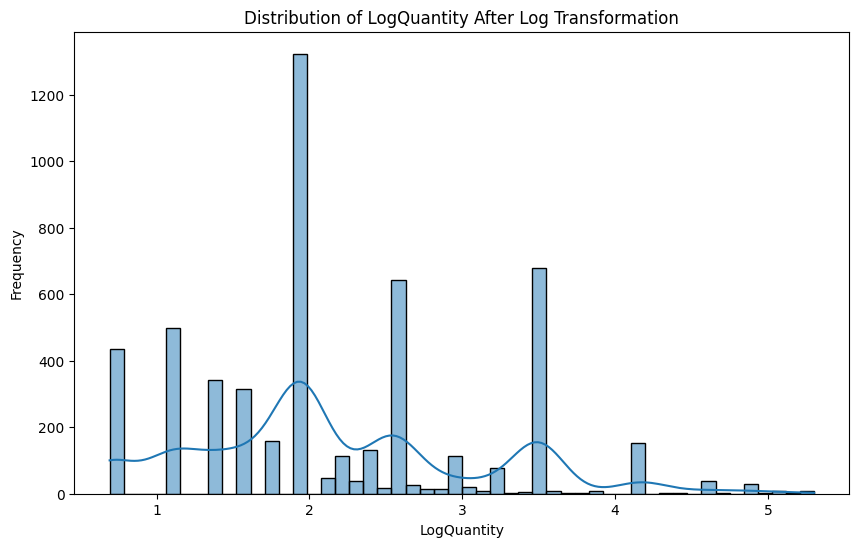

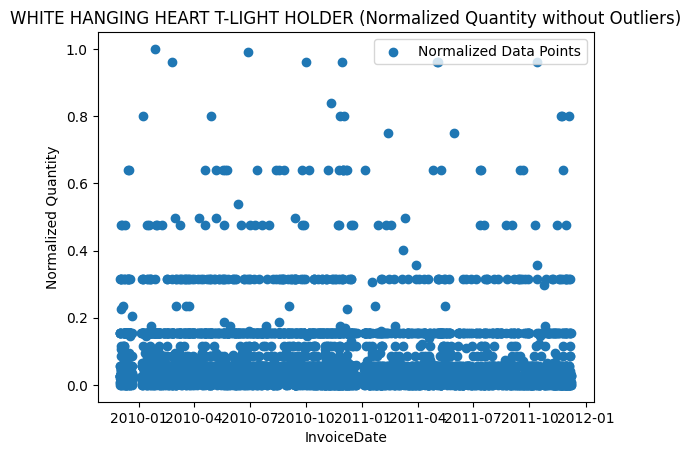

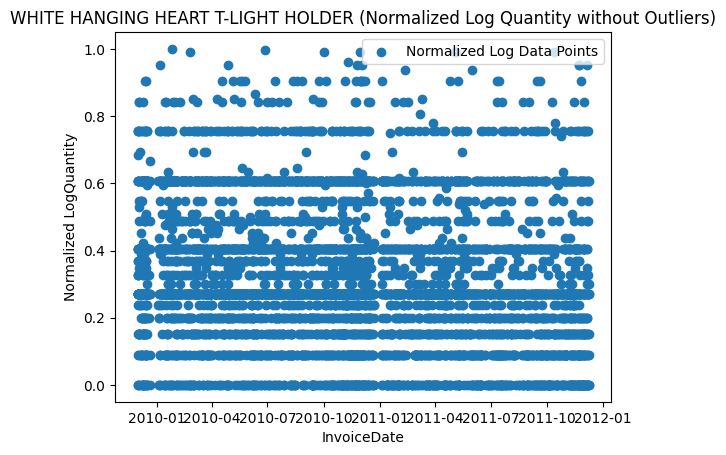

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming WHTLH_data is your DataFrame containing 'InvoiceDate' and 'Quantity'

# Calculate the Z-scores of the 'Quantity' column to identify outliers
WHTLH_data['Z_score'] = zscore(WHTLH_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
WHTLH_data_no_outliers = WHTLH_data[(WHTLH_data['Z_score'] < threshold) & (WHTLH_data['Z_score'] > -threshold)].copy()

# Drop the 'Z_score' column as it's no longer needed
WHTLH_data_no_outliers.drop(columns=['Z_score'], inplace=True)

# Apply log transformation to 'Quantity' column (adding 1 to avoid log(0))
WHTLH_data_no_outliers['LogQuantity'] = np.log(WHTLH_data_no_outliers['Quantity'] + 1)

# Replace any infinite values resulting from the log transformation with NaN
WHTLH_data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values (which might have occurred due to log transformation)
WHTLH_data_no_outliers.dropna(subset=['LogQuantity'], inplace=True)

# Apply min-max normalization to 'Quantity' and 'LogQuantity' columns
scaler = MinMaxScaler()

# Normalize both 'Quantity' and 'LogQuantity'
WHTLH_data_no_outliers[['NormQuantity', 'NormLogQuantity']] = scaler.fit_transform(WHTLH_data_no_outliers[['Quantity', 'LogQuantity']])

# Plot the distribution of Quantity before log transformation
plt.figure(figsize=(10, 6))
sns.histplot(WHTLH_data_no_outliers['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Before Log Transformation')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of LogQuantity after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(WHTLH_data_no_outliers['LogQuantity'], bins=50, kde=True)
plt.title('Distribution of LogQuantity After Log Transformation')
plt.xlabel('LogQuantity')
plt.ylabel('Frequency')
plt.show()

# Plot the scatter plot of normalized Quantity without outliers
x = WHTLH_data_no_outliers['InvoiceDate']
y = WHTLH_data_no_outliers['NormQuantity']

plt.scatter(x, y, label='Normalized Data Points')
plt.xlabel('InvoiceDate')
plt.ylabel('Normalized Quantity')
plt.legend()
plt.title('WHITE HANGING HEART T-LIGHT HOLDER (Normalized Quantity without Outliers)')
plt.show()

# Plot the scatter plot of normalized LogQuantity without outliers
y_log = WHTLH_data_no_outliers['NormLogQuantity']

plt.scatter(x, y_log, label='Normalized Log Data Points')
plt.xlabel('InvoiceDate')
plt.ylabel('Normalized LogQuantity')
plt.legend()
plt.title('WHITE HANGING HEART T-LIGHT HOLDER (Normalized Log Quantity without Outliers)')
plt.show()


In [ ]:
# Ensure 'InvoiceDateTime' is in datetime format
WHTLH_data_no_outliers['InvoiceDateTime'] = pd.to_datetime(WHTLH_data_no_outliers['InvoiceDateTime'])

# Convert 'InvoiceDateTime' to a numeric format (e.g., timestamp)
WHTLH_data_no_outliers['InvoiceDateTime_num'] = WHTLH_data_no_outliers['InvoiceDateTime'].apply(lambda x: x.timestamp())


Mean Squared Error (MSE): 0.0094
Root Mean Squared Error (RMSE): 0.0969
Mean Absolute Error (MAE): 0.0610
R-squared: 0.0039


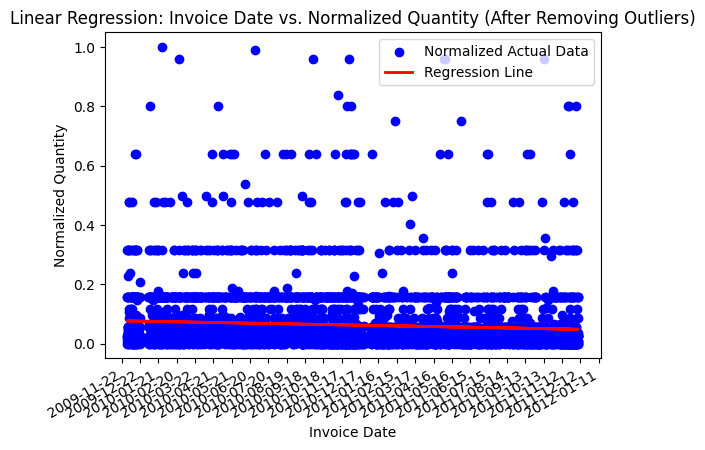

In [ ]:
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
import numpy as np

# Check or create the numeric representation of InvoiceDateTime
WHTLH_data_no_outliers['InvoiceDateTime'] = pd.to_datetime(WHTLH_data_no_outliers['InvoiceDateTime'])
WHTLH_data_no_outliers['InvoiceDateTime_num'] = WHTLH_data_no_outliers['InvoiceDateTime'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y) using the normalized Quantity
X_no_outliers = WHTLH_data_no_outliers[['InvoiceDateTime_num']]
y_no_outliers = WHTLH_data_no_outliers['NormQuantity']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize the Linear Regression model
model_no_outliers = LinearRegression()

# Fit the model on the training data
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data points without outliers (normalized values)
plt.scatter(WHTLH_data_no_outliers['InvoiceDateTime'], WHTLH_data_no_outliers['NormQuantity'], color='blue', label='Normalized Actual Data')

# Plot the regression line on the cleaned data (normalized values)
plt.plot(WHTLH_data_no_outliers['InvoiceDateTime'], model_no_outliers.predict(X_no_outliers), color='red', linewidth=2, label='Regression Line')

# Format the x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Invoice Date')
plt.ylabel('Normalized Quantity')
plt.title('Linear Regression: Invoice Date vs. Normalized Quantity (After Removing Outliers)')
plt.legend()

# Show the plot
plt.show()


1. Mean Squared Error (MSE): 0.0094
Interpretation: This is the average of the squared differences between the actual and predicted values. A lower MSE generally indicates a better fit, but on its own, it doesn't provide much context about the performance of the model relative to the scale of the data.
2. Root Mean Squared Error (RMSE): 0.0969
Interpretation: RMSE is the square root of MSE and has the same units as the dependent variable (Quantity). It tells us that, on average, the model's predictions deviate from the actual values by approximately 0.097 units. Depending on the range of your Quantity values, this could be seen as either a small or large error.
3. Mean Absolute Error (MAE): 0.0610
Interpretation: MAE is the average of the absolute differences between the actual and predicted values. It indicates that, on average, the model's predictions are off by about 0.061 units. Like RMSE, MAE is more interpretable in the context of the actual scale of your data.
4. R-squared (R²): 0.0039
Interpretation: R² represents the proportion of variance in the dependent variable (Quantity) that is predictable from the independent variable (InvoiceDateTime_num in your case). An R² of 0.0039 is very low, meaning that only about 0.39% of the variance in Quantity is explained by the model. This suggests that the model is not capturing the underlying pattern well, and the independent variable might not be a strong predictor of the dependent variable.
Overall Analysis:
Low R²: The extremely low R² value suggests that the model is not effective at explaining the variation in Quantity. This could imply that the relationship between InvoiceDateTime_num and Quantity is either weak or not linear, or that there are other important features not included in the model.

RMSE and MAE Values: Both RMSE and MAE are relatively small, which might seem positive. However, given the low R², these low error values may simply reflect that the variations in the data are small, or that the model is predicting values close to the mean of Quantity rather than capturing the true underlying pattern.

Conclusion:
Model Limitation: The combination of a low R² and relatively small error metrics suggests that while the model might not be making large errors, it is not doing a good job of explaining or predicting the variability in the data. This is a sign that the model may be underfitting, and it's likely not capturing the important factors that influence Quantity.

Next Steps:

Feature Engineering: Consider adding more features that could better explain Quantity.
Model Selection: Explore other regression models (e.g., polynomial regression, decision trees, or ensemble methods) that might capture the relationship better.
Data Analysis: Review the distribution and relationship of Quantity with other variables to ensure that the assumptions of linear regression are met.

Model Accuracy: 0.5991
Mean Squared Error (MSE): 0.2403
Root Mean Squared Error (RMSE): 0.4902
R-squared: 0.0084


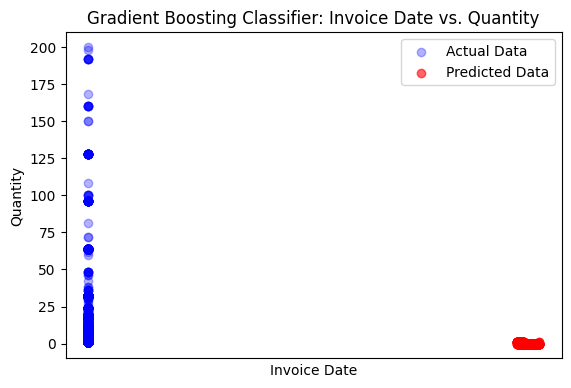

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Assuming WHTLH_data_no_outliers is your cleaned dataset without outliers

# Convert 'InvoiceDateTime' to a numeric format (if not already done)
WHTLH_data_no_outliers['InvoiceDateTime_num'] = WHTLH_data_no_outliers['InvoiceDateTime'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y)
X_no_outliers = WHTLH_data_no_outliers[['InvoiceDateTime_num']]
y_no_outliers = WHTLH_data_no_outliers['Quantity']

# Binarize the Quantity column for classification
y_no_outliers_binned = np.where(y_no_outliers > y_no_outliers.median(), 1, 0)

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers_binned, test_size=0.2, random_state=42
)

# Initialize the Gradient Boosting Classifier model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=42)

# Fit the model on the training data
clf.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred = clf.predict(X_test_no_outliers)
y_pred_prob = clf.predict_proba(X_test_no_outliers)[:, 1]  # Predicted probabilities for calculating R-squared

# Evaluate the model accuracy
score = clf.score(X_test_no_outliers, y_test_no_outliers)
print(f"Model Accuracy: {score:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_no_outliers, y_pred_prob)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_no_outliers, y_pred_prob)
print(f"R-squared: {r2:.4f}")

# Plot the actual data points without outliers
plt.scatter(WHTLH_data_no_outliers['InvoiceDateTime'], WHTLH_data_no_outliers['Quantity'], color='blue', label='Actual Data', alpha=0.3)

# Plot the predictions (note: since we binarized Quantity, this is a classification task)
plt.scatter(X_test_no_outliers['InvoiceDateTime_num'], y_pred, color='red', label='Predicted Data', alpha=0.6)

# Format the x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Invoice Date')
plt.ylabel('Quantity')
plt.title('Gradient Boosting Classifier: Invoice Date vs. Quantity')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X_no_outliers and y_no_outliers are already defined for your dataset

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize the RandomForestRegressor model
regr = RandomForestRegressor(max_depth=2, random_state=42)

# Fit the model on the training data
regr.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred = regr.predict(X_test_no_outliers)

# Evaluate the model using MSE, RMSE, R-squared, and MAE
mse = mean_squared_error(y_test_no_outliers, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_no_outliers, y_pred)
mae = mean_absolute_error(y_test_no_outliers, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



Mean Squared Error (MSE): 372.9126
Root Mean Squared Error (RMSE): 19.3109
R-squared: 0.0005
Mean Absolute Error (MAE): 12.1350


In [ ]:
# Define the product description you want to filter by
product_description = 'REGENCY CAKESTAND 3 TIER'
# Filter the DataFrame
RC3T_data = df[df['Description'] == product_description]
# Optionally, save the filtered data to a new Excel file
RC3T_data.to_excel('/content/drive/MyDrive/RC3T_data.xlsx', index=False)

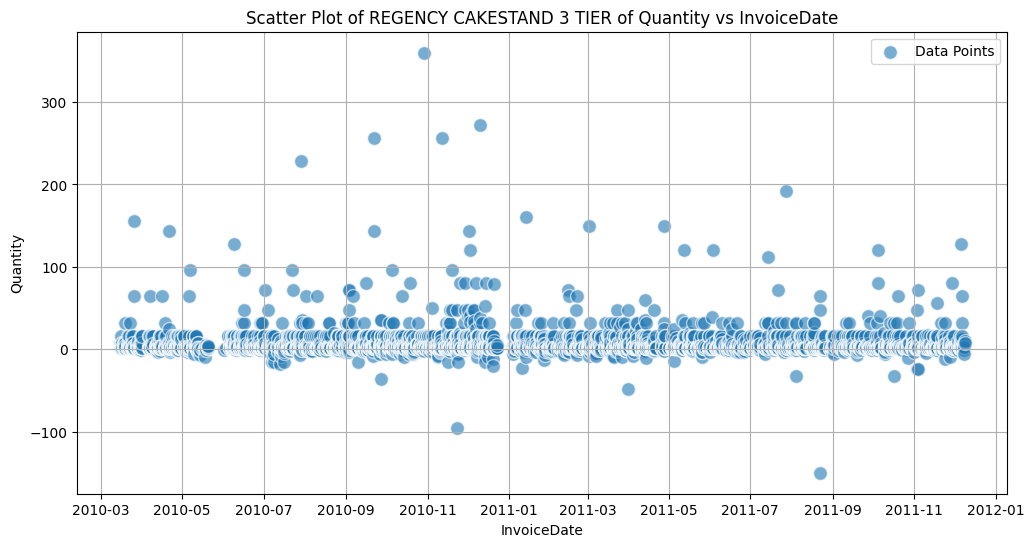

In [ ]:
# Ensure 'InvoiceDate' is in datetime format using .loc
RC3T_data.loc[:, 'InvoiceDate'] = pd.to_datetime(RC3T_data['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate'
RC3T_data_sorted = RC3T_data.sort_values(by='InvoiceDate')

# Extract sorted data points
x = RC3T_data_sorted['InvoiceDate']
y = RC3T_data_sorted['Quantity']

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data Points', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.title('Scatter Plot of REGENCY CAKESTAND 3 TIER of Quantity vs InvoiceDate')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-29-1b007edd76f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


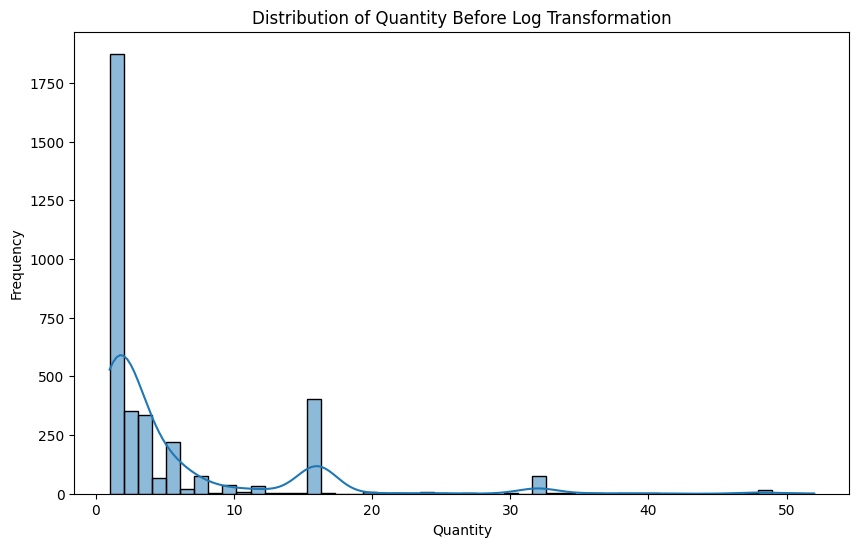

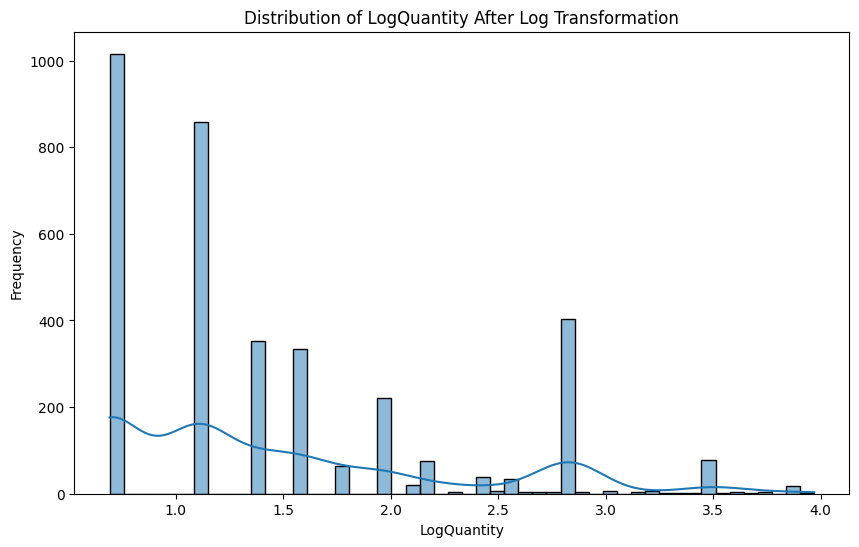

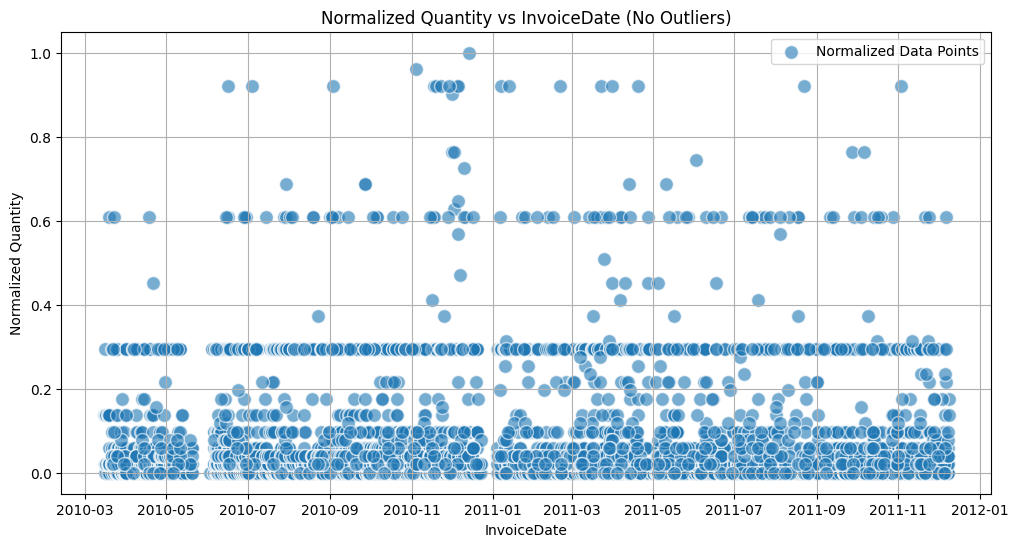

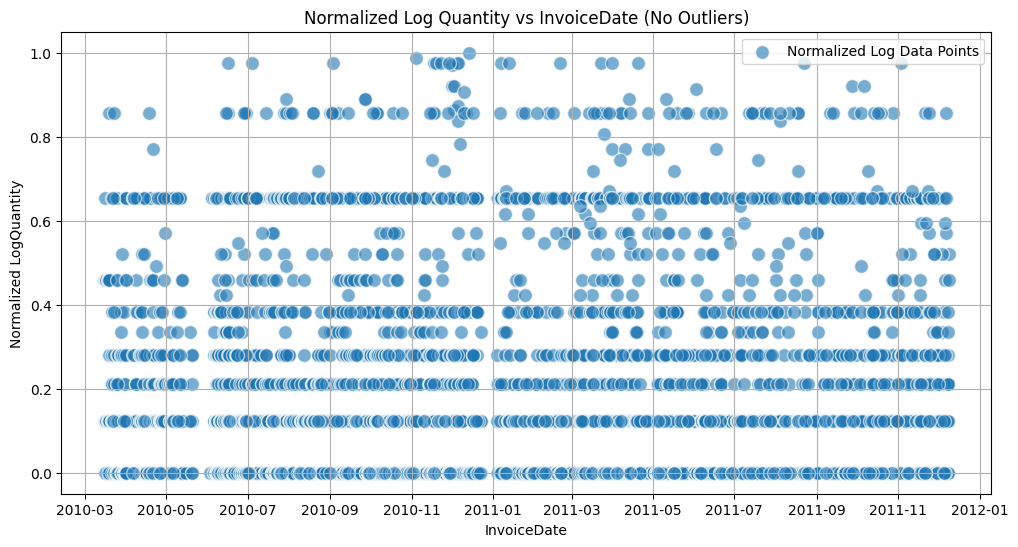

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ensure 'InvoiceDate' is in datetime format
RC3T_data.loc[:, 'InvoiceDate'] = pd.to_datetime(RC3T_data['InvoiceDate'])

# Calculate the Z-scores of the 'Quantity' column to identify outliers
RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
RC3T_data_no_outliers = RC3T_data[(RC3T_data['Z_score'] < threshold) & (RC3T_data['Z_score'] > -threshold)].copy()

# Drop the 'Z_score' column as it's no longer needed
RC3T_data_no_outliers.drop(columns=['Z_score'], inplace=True)

# Apply log transformation to 'Quantity' column (adding 1 to avoid log(0))
RC3T_data_no_outliers['LogQuantity'] = np.log(RC3T_data_no_outliers['Quantity'] + 1)

# Replace any infinite values resulting from the log transformation with NaN
RC3T_data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values (which might have occurred due to log transformation)
RC3T_data_no_outliers.dropna(subset=['LogQuantity'], inplace=True)

# Apply min-max normalization to 'Quantity' and 'LogQuantity' columns
scaler = MinMaxScaler()

# Normalize both 'Quantity' and 'LogQuantity'
RC3T_data_no_outliers[['NormQuantity', 'NormLogQuantity']] = scaler.fit_transform(RC3T_data_no_outliers[['Quantity', 'LogQuantity']])

# Plot the distribution of Quantity before log transformation
plt.figure(figsize=(10, 6))
sns.histplot(RC3T_data_no_outliers['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Before Log Transformation')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of LogQuantity after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(RC3T_data_no_outliers['LogQuantity'], bins=50, kde=True)
plt.title('Distribution of LogQuantity After Log Transformation')
plt.xlabel('LogQuantity')
plt.ylabel('Frequency')
plt.show()

# Plot the scatter plot of normalized Quantity without outliers
x = RC3T_data_no_outliers['InvoiceDate']
y = RC3T_data_no_outliers['NormQuantity']

plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Normalized Data Points', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('InvoiceDate')
plt.ylabel('Normalized Quantity')
plt.title('Normalized Quantity vs InvoiceDate (No Outliers)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the scatter plot of normalized LogQuantity without outliers
y_log = RC3T_data_no_outliers['NormLogQuantity']

plt.figure(figsize=(12, 6))
plt.scatter(x, y_log, label='Normalized Log Data Points', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('InvoiceDate')
plt.ylabel('Normalized LogQuantity')
plt.title('Normalized Log Quantity vs InvoiceDate (No Outliers)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-30-f0460de2f527>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean Squared Error (MSE): 0.0194
Root Mean Squared Error (RMSE): 0.1392
Mean Absolute Error (MAE): 0.0957
R-squared: -0.0028


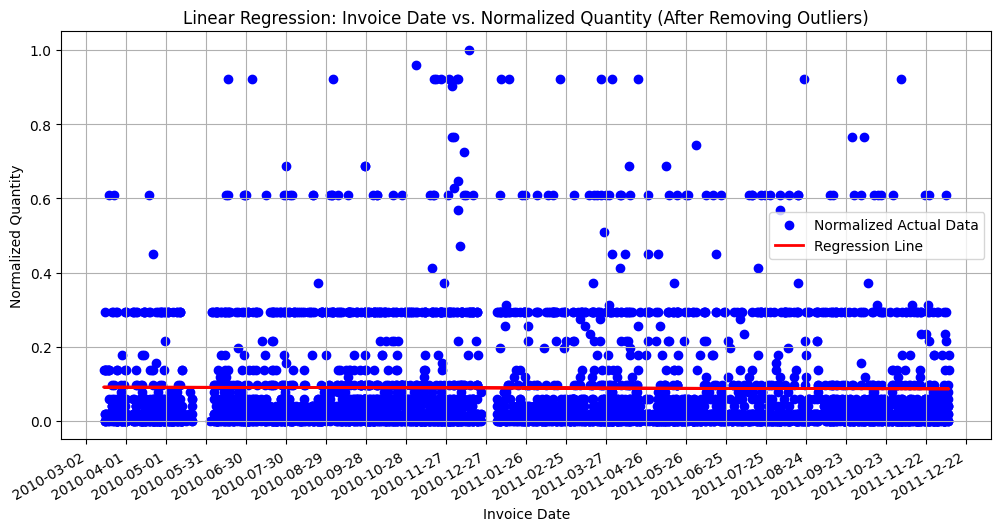

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Ensure 'InvoiceDate' is in datetime format
RC3T_data.loc[:, 'InvoiceDate'] = pd.to_datetime(RC3T_data['InvoiceDate'])

# Calculate the Z-scores of the 'Quantity' column to identify outliers
RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
RC3T_data_no_outliers = RC3T_data[(RC3T_data['Z_score'] < threshold) & (RC3T_data['Z_score'] > -threshold)].copy()

# Drop the 'Z_score' column as it's no longer needed
RC3T_data_no_outliers.drop(columns=['Z_score'], inplace=True)

# Apply log transformation to 'Quantity' column (adding 1 to avoid log(0))
RC3T_data_no_outliers['LogQuantity'] = np.log(RC3T_data_no_outliers['Quantity'] + 1)

# Replace any infinite values resulting from the log transformation with NaN
RC3T_data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values (which might have occurred due to log transformation)
RC3T_data_no_outliers.dropna(subset=['LogQuantity'], inplace=True)

# Apply min-max normalization to 'Quantity' and 'LogQuantity' columns
scaler = MinMaxScaler()
RC3T_data_no_outliers[['NormQuantity', 'NormLogQuantity']] = scaler.fit_transform(RC3T_data_no_outliers[['Quantity', 'LogQuantity']])

# Convert 'InvoiceDate' to a numeric format for regression analysis
RC3T_data_no_outliers['InvoiceDate_num'] = RC3T_data_no_outliers['InvoiceDate'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y)
X_no_outliers = RC3T_data_no_outliers[['InvoiceDate_num']]
y_no_outliers = RC3T_data_no_outliers['NormQuantity']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize and fit the Linear Regression model
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data points without outliers (normalized values)
plt.figure(figsize=(12, 6))
plt.scatter(RC3T_data_no_outliers['InvoiceDate'], RC3T_data_no_outliers['NormQuantity'], color='blue', label='Normalized Actual Data')

# Plot the regression line on the cleaned data (normalized values)
plt.plot(RC3T_data_no_outliers['InvoiceDate'], model_no_outliers.predict(X_no_outliers), color='red', linewidth=2, label='Regression Line')

# Format the x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Invoice Date')
plt.ylabel('Normalized Quantity')
plt.title('Linear Regression: Invoice Date vs. Normalized Quantity (After Removing Outliers)')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-31-20d63b8dc432>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean Squared Error (MSE): 0.0194
Root Mean Squared Error (RMSE): 0.1392
Mean Absolute Error (MAE): 0.0957
R-squared: -0.0028


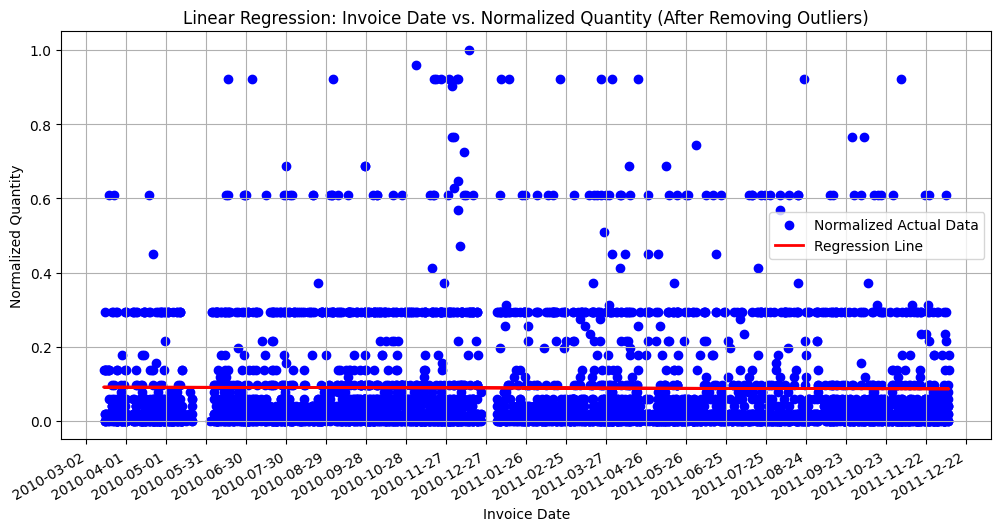

Model Accuracy: 0.5587
Mean Squared Error (MSE): 0.2480
Root Mean Squared Error (RMSE): 0.4980
R-squared: -0.0033


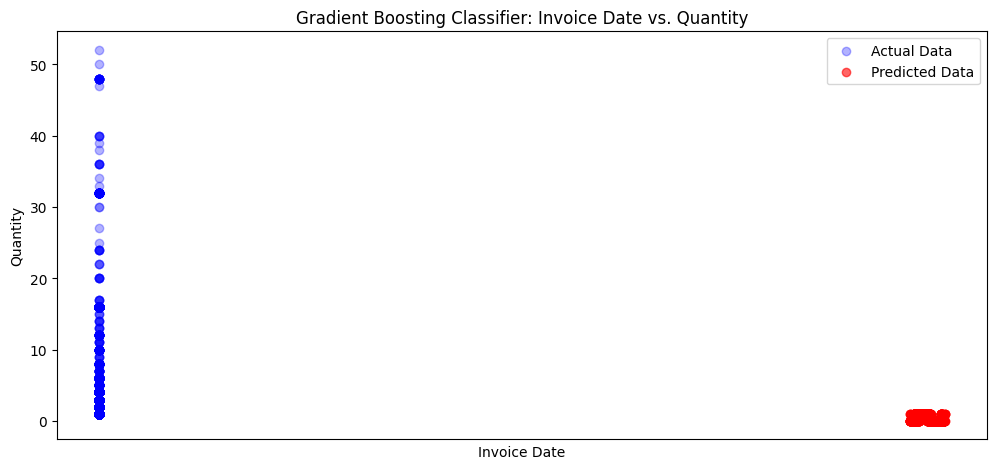

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure 'InvoiceDate' is in datetime format
RC3T_data.loc[:, 'InvoiceDate'] = pd.to_datetime(RC3T_data['InvoiceDate'])

# Calculate the Z-scores of the 'Quantity' column to identify outliers
RC3T_data['Z_score'] = zscore(RC3T_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
RC3T_data_no_outliers = RC3T_data[(RC3T_data['Z_score'] < threshold) & (RC3T_data['Z_score'] > -threshold)].copy()

# Drop the 'Z_score' column as it's no longer needed
RC3T_data_no_outliers.drop(columns=['Z_score'], inplace=True)

# Apply log transformation to 'Quantity' column (adding 1 to avoid log(0))
RC3T_data_no_outliers['LogQuantity'] = np.log(RC3T_data_no_outliers['Quantity'] + 1)

# Replace any infinite values resulting from the log transformation with NaN
RC3T_data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values (which might have occurred due to log transformation)
RC3T_data_no_outliers.dropna(subset=['LogQuantity'], inplace=True)

# Apply min-max normalization to 'Quantity' and 'LogQuantity' columns
scaler = MinMaxScaler()
RC3T_data_no_outliers[['NormQuantity', 'NormLogQuantity']] = scaler.fit_transform(RC3T_data_no_outliers[['Quantity', 'LogQuantity']])

# Convert 'InvoiceDate' to a numeric format for regression analysis
RC3T_data_no_outliers['InvoiceDate_num'] = RC3T_data_no_outliers['InvoiceDate'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y) for Linear Regression
X_no_outliers = RC3T_data_no_outliers[['InvoiceDate_num']]
y_no_outliers = RC3T_data_no_outliers['NormQuantity']

# Split the data into training and testing sets for Linear Regression
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize and fit the Linear Regression model
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Print evaluation metrics for Linear Regression
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data points without outliers (normalized values) for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(RC3T_data_no_outliers['InvoiceDate'], RC3T_data_no_outliers['NormQuantity'], color='blue', label='Normalized Actual Data')
plt.plot(RC3T_data_no_outliers['InvoiceDate'], model_no_outliers.predict(X_no_outliers), color='red', linewidth=2, label='Regression Line')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xlabel('Invoice Date')
plt.ylabel('Normalized Quantity')
plt.title('Linear Regression: Invoice Date vs. Normalized Quantity (After Removing Outliers)')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Gradient Boosting Classification
# Binarize the Quantity column for classification
y_no_outliers_binned = np.where(y_no_outliers > y_no_outliers.median(), 1, 0)

# Split the data into training and testing sets for Classification
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers_binned, test_size=0.2, random_state=42
)

# Initialize and fit the Gradient Boosting Classifier model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred = clf.predict(X_test_no_outliers)
y_pred_prob = clf.predict_proba(X_test_no_outliers)[:, 1]  # Predicted probabilities for calculating R-squared

# Evaluate the model accuracy
score = clf.score(X_test_no_outliers, y_test_no_outliers)
print(f"Model Accuracy: {score:.4f}")

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_no_outliers, y_pred_prob)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_no_outliers, y_pred_prob)
print(f"R-squared: {r2:.4f}")

# Plot the actual data points without outliers for Gradient Boosting Classification
plt.figure(figsize=(12, 6))
plt.scatter(RC3T_data_no_outliers['InvoiceDate'], RC3T_data_no_outliers['Quantity'], color='blue', label='Actual Data', alpha=0.3)
plt.scatter(X_test_no_outliers['InvoiceDate_num'], y_pred, color='red', label='Predicted Data', alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xlabel('Invoice Date')
plt.ylabel('Quantity')
plt.title('Gradient Boosting Classifier: Invoice Date vs. Quantity')
plt.legend()
plt.show()


In [ ]:
# Define the product description you want to filter by
product_description = 'JUMBO BAG RED RETROSPOT'
# Filter the DataFrame
JBRR_data = df[df['Description'] == product_description]
# Optionally, save the filtered data to a new Excel file
JBRR_data.to_excel('/content/drive/MyDrive/JBRR_data.xlsx', index=False)

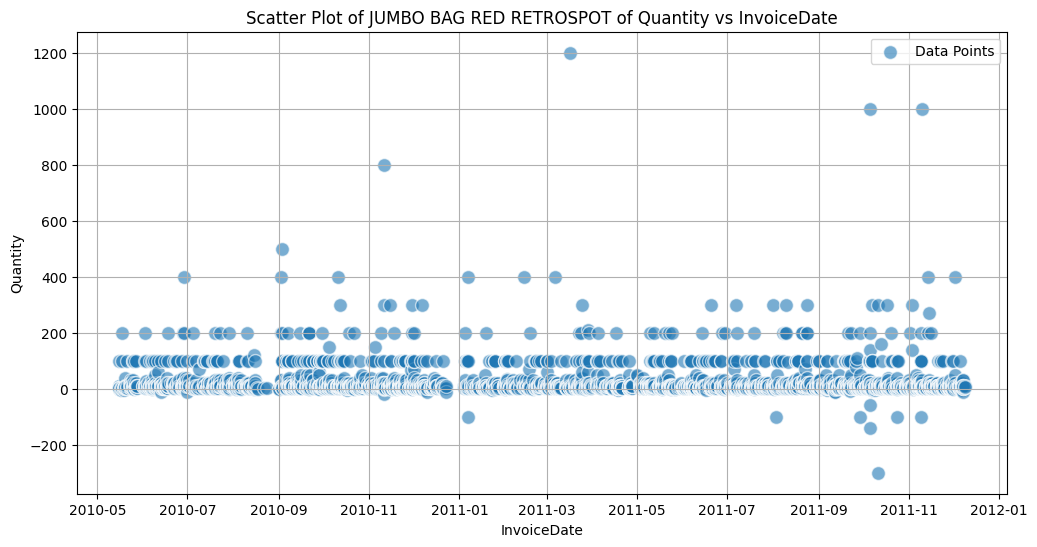

In [ ]:
# Ensure 'InvoiceDate' is in datetime format using .loc
JBRR_data.loc[:, 'InvoiceDate'] = pd.to_datetime(JBRR_data['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate'
JBRR_data_sorted = JBRR_data.sort_values(by='InvoiceDate')

# Extract sorted data points
x = JBRR_data_sorted['InvoiceDate']
y = JBRR_data_sorted['Quantity']

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data Points', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.title('Scatter Plot of JUMBO BAG RED RETROSPOT of Quantity vs InvoiceDate')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-34-37a071367032>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JBRR_data['Z_score'] = zscore(JBRR_data['Quantity'])
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


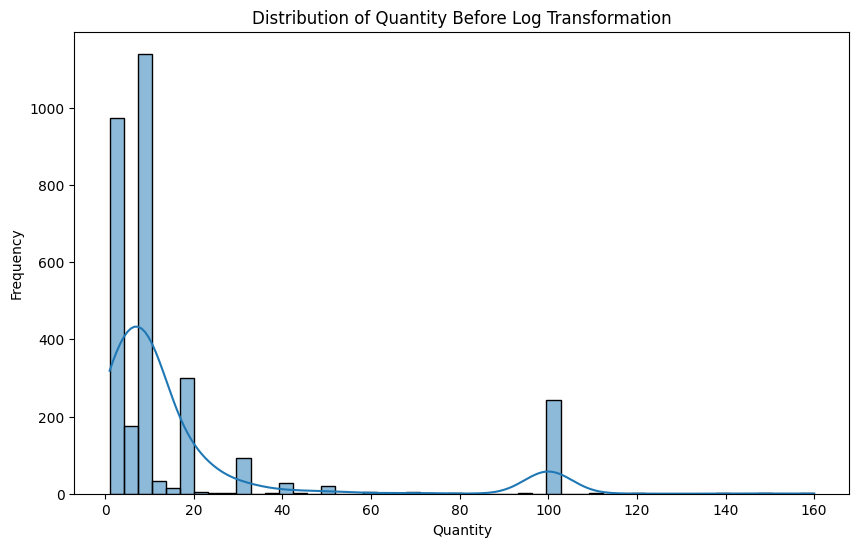

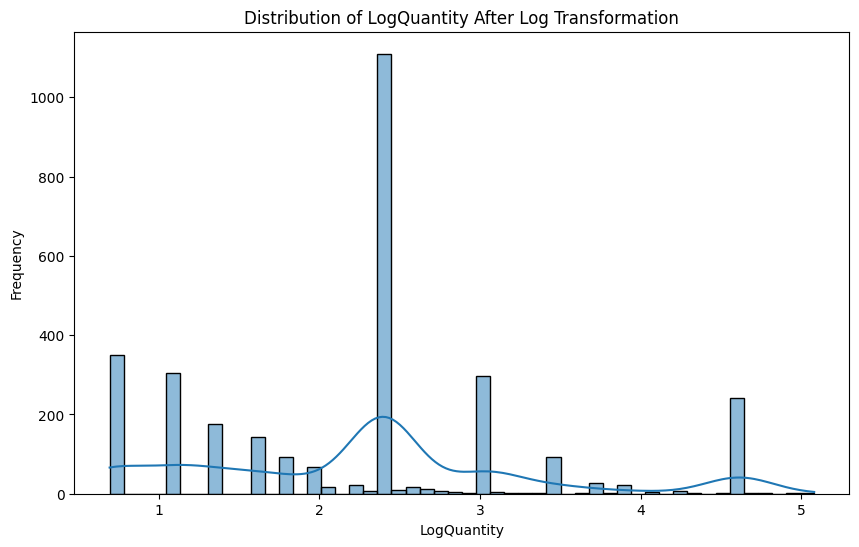

Mean Squared Error (MSE): 0.0235
Root Mean Squared Error (RMSE): 0.1534
Mean Absolute Error (MAE): 0.0980
R-squared: -0.0061


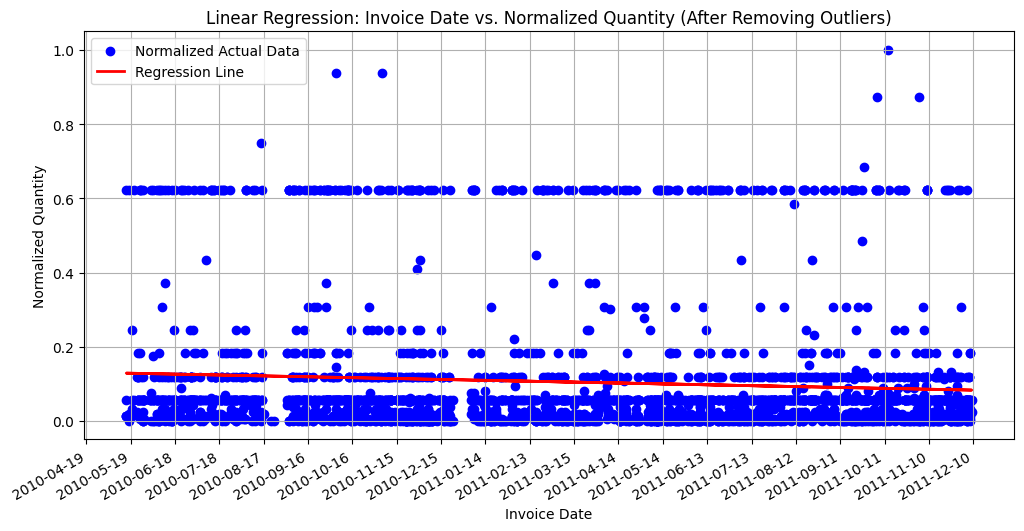

Model Accuracy: 0.7672
Mean Squared Error (MSE): 0.1796
Root Mean Squared Error (RMSE): 0.4237
R-squared: -0.0054


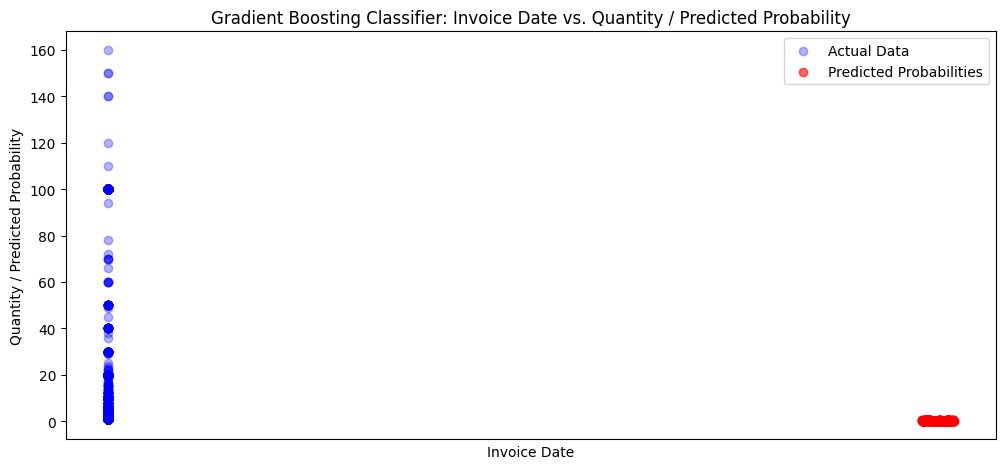

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure 'InvoiceDate' is in datetime format
JBRR_data.loc[:, 'InvoiceDate'] = pd.to_datetime(JBRR_data['InvoiceDate'])

# Calculate the Z-scores of the 'Quantity' column to identify outliers
JBRR_data['Z_score'] = zscore(JBRR_data['Quantity'])

# Define a threshold to identify outliers
threshold = 3

# Remove the outliers based on the Z-score
JBRR_data_no_outliers = JBRR_data[(JBRR_data['Z_score'] < threshold) & (JBRR_data['Z_score'] > -threshold)].copy()

# Drop the 'Z_score' column as it's no longer needed
JBRR_data_no_outliers.drop(columns=['Z_score'], inplace=True)

# Apply log transformation to 'Quantity' column (adding 1 to avoid log(0))
JBRR_data_no_outliers['LogQuantity'] = np.log(JBRR_data_no_outliers['Quantity'] + 1)

# Replace any infinite values resulting from the log transformation with NaN
JBRR_data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows with NaN values (which might have occurred due to log transformation)
JBRR_data_no_outliers.dropna(subset=['LogQuantity'], inplace=True)

# Apply min-max normalization to 'Quantity' and 'LogQuantity' columns
scaler = MinMaxScaler()
JBRR_data_no_outliers[['NormQuantity', 'NormLogQuantity']] = scaler.fit_transform(JBRR_data_no_outliers[['Quantity', 'LogQuantity']])

# Plot the distribution of Quantity before log transformation
plt.figure(figsize=(10, 6))
sns.histplot(JBRR_data_no_outliers['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Before Log Transformation')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of LogQuantity after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(JBRR_data_no_outliers['LogQuantity'], bins=50, kde=True)
plt.title('Distribution of LogQuantity After Log Transformation')
plt.xlabel('LogQuantity')
plt.ylabel('Frequency')
plt.show()

# Convert 'InvoiceDate' to a numeric format for regression analysis
JBRR_data_no_outliers['InvoiceDate_num'] = JBRR_data_no_outliers['InvoiceDate'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y) for Linear Regression
X_no_outliers = JBRR_data_no_outliers[['InvoiceDate_num']]
y_no_outliers = JBRR_data_no_outliers['NormQuantity']

# Split the data into training and testing sets for Linear Regression
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize and fit the Linear Regression model
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Calculate evaluation metrics for Linear Regression
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
r2 = r2_score(y_test_no_outliers, y_pred_no_outliers)

# Print evaluation metrics for Linear Regression
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the original data points without outliers (normalized values) for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(JBRR_data_no_outliers['InvoiceDate'], JBRR_data_no_outliers['NormQuantity'], color='blue', label='Normalized Actual Data')
plt.plot(JBRR_data_no_outliers['InvoiceDate'], model_no_outliers.predict(JBRR_data_no_outliers[['InvoiceDate_num']]), color='red', linewidth=2, label='Regression Line')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xlabel('Invoice Date')
plt.ylabel('Normalized Quantity')
plt.title('Linear Regression: Invoice Date vs. Normalized Quantity (After Removing Outliers)')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Gradient Boosting Classification
# Binarize the Quantity column for classification
y_no_outliers_binned = np.where(y_no_outliers > y_no_outliers.median(), 1, 0)

# Split the data into training and testing sets for Classification
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers_binned, test_size=0.2, random_state=42
)

# Initialize and fit the Gradient Boosting Classifier model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred = clf.predict(X_test_no_outliers)
y_pred_prob = clf.predict_proba(X_test_no_outliers)[:, 1]  # Predicted probabilities for calculating R-squared

# Evaluate the model accuracy
score = clf.score(X_test_no_outliers, y_test_no_outliers)
print(f"Model Accuracy: {score:.4f}")

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_no_outliers, y_pred_prob)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_no_outliers, y_pred_prob)
print(f"R-squared: {r2:.4f}")

# Plot the actual data points without outliers for Gradient Boosting Classification
plt.figure(figsize=(12, 6))
plt.scatter(JBRR_data_no_outliers['InvoiceDate'], JBRR_data_no_outliers['Quantity'], color='blue', label='Actual Data', alpha=0.3)
plt.scatter(X_test_no_outliers['InvoiceDate_num'], y_pred_prob, color='red', label='Predicted Probabilities', alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xlabel('Invoice Date')
plt.ylabel('Quantity / Predicted Probability')
plt.title('Gradient Boosting Classifier: Invoice Date vs. Quantity / Predicted Probability')
plt.legend()
plt.show()


Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.0233
Root Mean Squared Error (RMSE): 0.1528
Mean Absolute Error (MAE): 0.0976
R-squared: 0.0028


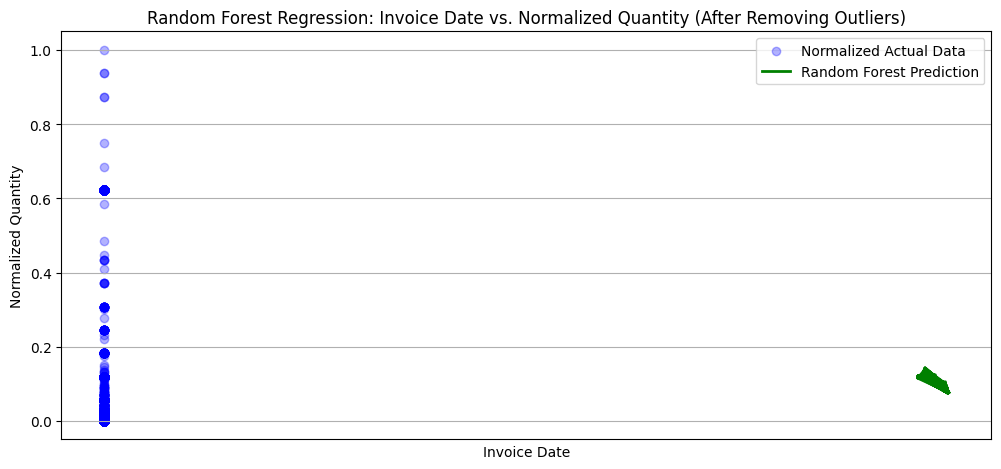

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
# Assuming JBRR_data_no_outliers is already preprocessed as per your previous steps

# Convert 'InvoiceDate' to a numeric format for regression analysis
JBRR_data_no_outliers['InvoiceDate_num'] = JBRR_data_no_outliers['InvoiceDate'].apply(lambda x: x.timestamp())

# Separate features (X) and target (y) for Random Forest Regression
X_no_outliers = JBRR_data_no_outliers[['InvoiceDate_num']]
y_no_outliers = JBRR_data_no_outliers['NormQuantity']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(max_depth=2, random_state=0)
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test data
y_pred_no_outliers_rf = rf_model.predict(X_test_no_outliers)

# Calculate evaluation metrics for Random Forest Regression
mse_rf = mean_squared_error(y_test_no_outliers, y_pred_no_outliers_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers_rf)
r2_rf = r2_score(y_test_no_outliers, y_pred_no_outliers_rf)

# Print evaluation metrics for Random Forest Regression
print(f"Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(JBRR_data_no_outliers['InvoiceDate'], JBRR_data_no_outliers['NormQuantity'], color='blue', label='Normalized Actual Data', alpha=0.3)
plt.plot(X_test_no_outliers['InvoiceDate_num'], y_pred_no_outliers_rf, color='green', linewidth=2, label='Random Forest Prediction')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xlabel('Invoice Date')
plt.ylabel('Normalized Quantity')
plt.title('Random Forest Regression: Invoice Date vs. Normalized Quantity (After Removing Outliers)')
plt.legend()
plt.grid(True)
plt.show()
